In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
path="/content/drive/MyDrive/Music corpors"
Music_documents=os.listdir(path)
print(Music_documents)

['Alash Ensemble.txt', 'Ambiances Magne╠ütiques.txt', '78th Fraser Highlanders Pipe Band.txt', 'Boghall and Bathgate Caledonia Pipe Band.txt', 'Worldbeat.txt', 'Windsor Police Pipe Band.txt', 'Bhajan.txt', 'Cantus in Memoriam Benjamin Britten.txt', 'Adityahridayam.txt', 'Abdelazer.txt', 'Brief & Trunks.txt', '2112 (song).txt', 'Yazoo Records.txt', "A Midsummer Night's Dream (Mendelssohn).txt", 'Appleseed Recordings.txt', 'American gamelan.txt', 'Where the Rainbow Ends.txt', "All Tomorrow's Parties.txt", "Beck's Bolero.txt", 'Bird of Prey (Uriah Heep song).txt', 'Boot Records.txt', 'Why (The Byrds song).txt', 'Across the Universe.txt', 'A╠üngel Parra.txt', 'Abhang.txt', 'Alapana.txt', 'Alix Olson.txt', 'Alta cappella.txt', 'Andean new age music.txt', 'Because (Beatles song).txt', 'Aranis.txt', 'Autoluminescent.txt', 'Burra katha.txt', 'Black Hen Music.txt', 'Canterbury Caledonian Society Pipe Band.txt', 'Antwerp & District Pipe Band.txt', 'Anthology of Indian Classical Music ÔÇô A 

**Cleaning Text:**

In [30]:
import string
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3)) and w.isalnum()]) 
    
    return text2.lower()

In [31]:

cleaned_documents=[]
for doc in Music_documents:
  doc_path=path+'/'+doc
  with open(doc_path, 'r',encoding='utf-8', errors='ignore') as rf:
   text= rf.read()
   result=clean_text(text)
   cleaned_documents.append(result)


In [33]:
f=open('cleaned_documents.txt','w')
for i in range(len(cleaned_documents)):
  f.write('cleaned_document '+str(i)+' : ')
  f.write(cleaned_documents[i])
  f.write('\n')

**Removing Stopwords:**

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Tokenization and Lemmatization:**



In [53]:
import spacy
import string
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.max_length = 15000000
pos_tags=['noun','verb','punct','prep','root']
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for doc in texts:
             doc = nlp(doc) 
             output.append([token.lemma_ for token in doc if (token.pos_ in allowed_postags and token.text not in stop_words and token.lemma_ not in pos_tags ) ])
       return output

In [54]:
tokenized_docs= lemmatization(cleaned_documents)
print(tokenized_docs[0])

['band', 'traditional', 'music', 'nontraditional', 'influence', 'history', 'musician', 'traditional', 'music', 'childhood', 'family', 'student', 'master', 'throat', 'singer', 'resident', 'traditional', 'ensemble', 'time', 'young', 'musician', 'harmony', 'theory', 'staff', 'notation', 'western', 'classical', 'music', 'incorporate', 'nontraditional', 'element', 'instrument', 'sound', 'traditional', 'music', 'shoor', 'wind', 'instrument', 'tuva', 'today', 'western', 'instrument', 'guitar', 'accordion', 'outgrowth', 'musical', 'exploration', 'ensemble', 'alash', 'musician', 'home', 'region', 'first', 'artistic', 'director', 'role', 'development', 'ensemble', 'inception', 'alash', 'several', 'personnel', 'change', 'former', 'member', 'symposium', 'competition', 'ensemble', 'member', 'good', 'male', 'singer', 'young', 'person', 'prestigious', 'award', 'first', 'second', 'individual', 'throat', 'shirizhik', 'title', 'artist', 'funding', 'national', 'endowment', 'trip', 'crosscultural', 'art',

In [46]:
print(len(tokenized_docs))

1342


In [55]:
f=open('tokenized_docs.txt','w')
for i in range(len(tokenized_docs)):
  f.write('tokenized_doc'+str(i)+':')
  for j in range(len(tokenized_docs[i])):
    f.write(tokenized_docs[i][j])
    f.write('\t')
  f.write('\n')
f.close()

Creating Vocabulary Dictionary and Document Term Matrix:

In [56]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_docs)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_docs]

In [58]:
f=open('dictionary.txt','w')
for i in range(len(dictionary)):
  f.write(dictionary[i])
  f.write('\n')
f.close()

In [59]:
print(len(dictionary))

26754


In [60]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=6, random_state=100,
                chunksize=1000, passes=50,iterations=100)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [61]:
lda_model.print_topics()

[(0,
  '0.011*"shatner" + 0.010*"film" + 0.007*"show" + 0.007*"performance" + 0.007*"musical" + 0.006*"dance" + 0.006*"woman" + 0.006*"role" + 0.005*"production" + 0.005*"actor"'),
 (1,
  '0.044*"song" + 0.026*"single" + 0.022*"version" + 0.021*"video" + 0.015*"number" + 0.011*"chart" + 0.010*"track" + 0.010*"lyric" + 0.010*"music" + 0.010*"album"'),
 (2,
  '0.057*"pobj" + 0.031*"dobj" + 0.024*"compound" + 0.023*"music" + 0.017*"amod" + 0.017*"part" + 0.011*"auxpass" + 0.011*"nsubj" + 0.010*"propn" + 0.009*"band"'),
 (3,
  '0.065*"music" + 0.011*"style" + 0.010*"rock" + 0.010*"artist" + 0.010*"jazz" + 0.008*"popular" + 0.008*"genre" + 0.008*"musician" + 0.008*"band" + 0.008*"early"'),
 (4,
  '0.032*"band" + 0.012*"album" + 0.011*"record" + 0.011*"song" + 0.011*"black" + 0.010*"year" + 0.009*"music" + 0.009*"time" + 0.008*"metal" + 0.008*"member"'),
 (5,
  '0.023*"music" + 0.015*"song" + 0.008*"musical" + 0.008*"century" + 0.007*"work" + 0.006*"singer" + 0.006*"time" + 0.006*"opera" + 0

Visualization of LDA topic results:

In [62]:
pip install pyLDAvis

In [63]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.096995  0.006294       1        1  56.115124
3     -0.114603 -0.054949       2        1  15.961847
4     -0.036450  0.017501       3        1  13.833300
5     -0.044352 -0.084038       4        1   7.922450
1      0.064119  0.213644       5        1   3.452468
0      0.228282 -0.098452       6        1   2.714811, topic_info=          Term          Freq         Total Category  logprob  loglift
21195     pobj  24143.000000  24143.000000  Default  30.0000  30.0000
54       music  20056.000000  20056.000000  Default  29.0000  29.0000
508       song   6035.000000   6035.000000  Default  28.0000  28.0000
19641     dobj  12977.000000  12977.000000  Default  27.0000  27.0000
8         band   8191.000000   8191.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
81      singer     69.290729   2658.221021   Topic6  -5.6888  -0.0407
686      stage     56.377270    754.498881   Topic6  -5.8950   1.0125
223      local     53.418979    522.973480   Topic6  -5.9489   1.3251
311    popular     58.920963   2062.890880   Topic6  -5.8509   0.0508
150     number     59.758666   2747.370144   Topic6  -5.8367  -0.2216

[485 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1044       1  0.044700      1960
1044       2  0.824160      1960
1044       3  0.106163      1960
1044       4  0.025144      1960
1585       1  0.100972      1970
...      ...       ...       ...
200        2  0.008429   youtube
200        3  0.193865   youtube
200        4  0.025287   youtube
200        5  0.514164   youtube
22812      6  0.916397  zarzuela

[1100 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 6, 2, 1])

 Wordcloud of Top N words in each topic:


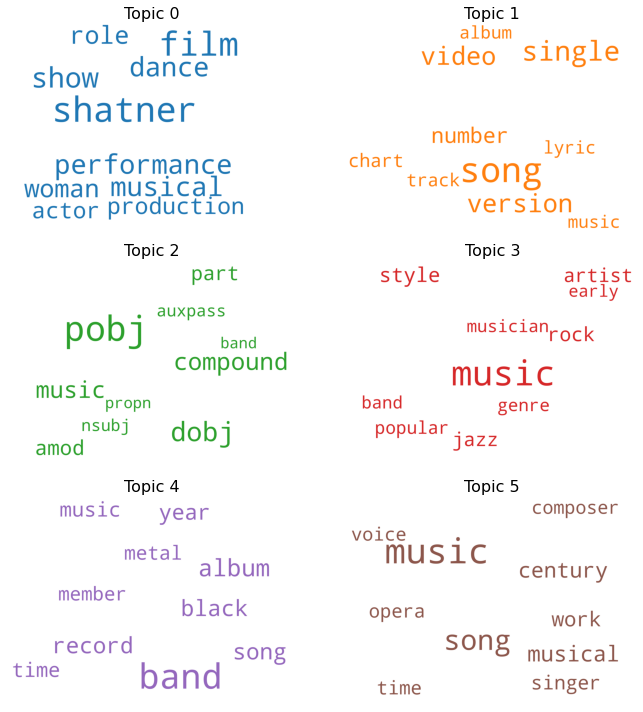

In [64]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()